In [2]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TreebankWordTokenizer

## Tokenisation

In [3]:
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

In [13]:
""" 
    Tokenisation: 
    paragraph -> sentences
    sentence -> words
"""
corpus = """ I am Kabir 's.
    From Haryana.
    Studying NLP.
"""
documents = sent_tokenize(corpus)
print(documents)

[" I am Kabir 's.", 'From Haryana.', 'Studying NLP.']


In [14]:
words1 = word_tokenize(corpus)  
print(words1)
words2 = wordpunct_tokenize(corpus)     # all punc considered separate words
print(words2)

['I', 'am', 'Kabir', "'s", '.', 'From', 'Haryana', '.', 'Studying', 'NLP', '.']
['I', 'am', 'Kabir', "'", 's', '.', 'From', 'Haryana', '.', 'Studying', 'NLP', '.']


In [16]:
tokeniser = TreebankWordTokenizer()     # . is not considered separate word
words3 = tokeniser.tokenize(corpus)
print(words3)

['I', 'am', 'Kabir', "'s.", 'From', 'Haryana.', 'Studying', 'NLP', '.']


## Stemming
### Process of Reducing word to its stem

In [19]:
words = ["eating","eats","eaten","writing","writes","programming","programs","finally","finalised","history"]

In [20]:
from nltk.stem import PorterStemmer

# Porter Stemmer
stemming = PorterStemmer()
for word in words:
    print(word+"------>"+stemming.stem(word))

eating------>eat
eats------>eat
eaten------>eaten
writing------>write
writes------>write
programming------>program
programs------>program
finally------>final
finalised------>finalis
history------>histori


In [21]:
stemming.stem('congratulations')    # disadvantage: changes meaning

'congratul'

In [22]:
from nltk.stem import RegexpStemmer

# Regex Stemmer
reg_stemmer = RegexpStemmer(r"ing$|s$|e$|able$",min = 4)
reg_stemmer.stem('eating')

'eat'

In [24]:
from nltk.stem import SnowballStemmer

# Snowball Stemmer
snow_stemmer = SnowballStemmer('english')
for word in words:
    print(word+"------>"+snow_stemmer.stem(word))

eating------>eat
eats------>eat
eaten------>eaten
writing------>write
writes------>write
programming------>program
programs------>program
finally------>final
finalised------>finalis
history------>histori


## Lemmatizer
#### Lemmatization is like stemming, where output will be exact root word.

In [26]:
# Q&A, text summarisation, Chatbots
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer  = WordNetLemmatizer()
""" 
    POS tags :-
    n - nouns
    v - verb
    a - adjective
    r - adverb
"""
print(lemmatizer.lemmatize("going",pos='v'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kabirsprakash/nltk_data...


go


In [27]:
for word in words:
    print(word+"----->"+lemmatizer.lemmatize(word)) 

eating----->eating
eats----->eats
eaten----->eaten
writing----->writing
writes----->writes
programming----->programming
programs----->program
finally----->finally
finalised----->finalised
history----->history


## Stopwords

In [28]:
para = """ My dear young friends, I have always believed that dreams are not those which you see while sleeping, but those that do not let you sleep. Each one of you has within you the power to shape your future, to ignite your imagination and work with dedication. When I was a boy in Rameswaram, no one could have predicted that I would one day become the President of India. It was possible because of the vision I had, and the support of my teachers and family. Education is the most powerful weapon that can transform a child from a small village into a scientist, a leader, or an entrepreneur. Do not underestimate the value of hard work and perseverance. Failures are part of life. If you never fail, you will never learn. I want every youth in this country to take responsibility — to be courageous, to innovate, to think big. The nation needs dreamers who are also doers. We need individuals who are not afraid to question, to challenge the status quo, and to walk the untrodden path. India’s future lies in the hands of its youth — your hands. So dream big, aim high, and let your thoughts and actions be guided by integrity, compassion, and a relentless pursuit of excellence."""

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kabirsprakash/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
stemmer = PorterStemmer()
sentences = nltk.sent_tokenize(para)

In [38]:
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)

print(sentences)

['my dear young friend , i alway believ dream see sleep , let sleep .', 'each one within power shape futur , ignit imagin work dedic .', 'when i boy rameswaram , one could predict i would one day becom presid india .', 'it possibl vision i , support teacher famili .', 'educ power weapon transform child small villag scientist , leader , entrepreneur .', 'do underestim valu hard work persever .', 'failur part life .', 'if never fail , never learn .', 'i want everi youth countri take respons — courag , innov , think big .', 'the nation need dreamer also doer .', 'we need individu afraid question , challeng statu quo , walk untrodden path .', 'india ’ futur lie hand youth — hand .', 'so dream big , aim high , let thought action guid integr , compass , relentless pursuit excel .']


In [41]:
lemmatizer = WordNetLemmatizer()
sentences = nltk.sent_tokenize(para)
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word.lower(),pos='v') for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = " ".join(words)
 
print(sentences)

['my dear young friends , i always believe dream see sleep , let sleep .', 'each one within power shape future , ignite imagination work dedication .', 'when i boy rameswaram , one could predict i would one day become president india .', 'it possible vision i , support teachers family .', 'education powerful weapon transform child small village scientist , leader , entrepreneur .', 'do underestimate value hard work perseverance .', 'failures part life .', 'if never fail , never learn .', 'i want every youth country take responsibility — courageous , innovate , think big .', 'the nation need dreamers also doers .', 'we need individuals afraid question , challenge status quo , walk untrodden path .', 'india ’ future lie hand youth — hand .', 'so dream big , aim high , let thoughts action guide integrity , compassion , relentless pursuit excellence .']


### POS Tagging

In [42]:
sentences = sent_tokenize(para)

In [45]:
nltk.download('averaged_perceptron_tagger_eng')
# Finding POS tags
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [word for word in words if word not in set(stopwords.words('english'))]
    pos_tag = nltk.pos_tag(words)
    print(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/kabirsprakash/nltk_data...


[('My', 'PRP$'), ('dear', 'JJ'), ('young', 'JJ'), ('friends', 'NNS'), (',', ','), ('I', 'PRP'), ('always', 'RB'), ('believed', 'VBD'), ('dreams', 'NNS'), ('see', 'VBP'), ('sleeping', 'VBG'), (',', ','), ('let', 'VB'), ('sleep', 'NN'), ('.', '.')]
[('Each', 'DT'), ('one', 'CD'), ('within', 'IN'), ('power', 'NN'), ('shape', 'NN'), ('future', 'NN'), (',', ','), ('ignite', 'JJ'), ('imagination', 'NN'), ('work', 'NN'), ('dedication', 'NN'), ('.', '.')]
[('When', 'WRB'), ('I', 'PRP'), ('boy', 'VBP'), ('Rameswaram', 'NNP'), (',', ','), ('one', 'CD'), ('could', 'MD'), ('predicted', 'VB'), ('I', 'PRP'), ('would', 'MD'), ('one', 'CD'), ('day', 'NN'), ('become', 'VB'), ('President', 'NNP'), ('India', 'NNP'), ('.', '.')]
[('It', 'PRP'), ('possible', 'JJ'), ('vision', 'NN'), ('I', 'PRP'), (',', ','), ('support', 'NN'), ('teachers', 'NNS'), ('family', 'NN'), ('.', '.')]
[('Education', 'NN'), ('powerful', 'JJ'), ('weapon', 'JJ'), ('transform', 'NN'), ('child', 'NN'), ('small', 'JJ'), ('village', 'NN'

[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [47]:
ex_ls = []
for word in "Taj Mahal is a beautiful monument".split():
    ex_ls.append(word)
print(nltk.pos_tag(ex_ls))

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN')]


### Named Entity Recognition

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/kabirsprakash/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/kabirsprakash/nltk_data...
[nltk_data]   Package words is already up-to-date!


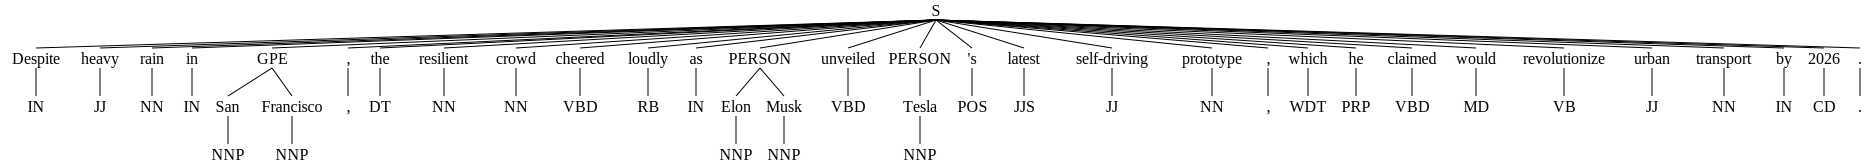

In [4]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

words = word_tokenize("Despite heavy rain in San Francisco, the resilient crowd cheered loudly as Elon Musk unveiled Tesla's latest self-driving prototype, which he claimed would revolutionize urban transport by 2026.")
nltk.ne_chunk(nltk.pos_tag(words))

### Word Embeddings
used for representation of words for text analysis typically in form a real valued vector that encodes meaning of word such that words are closer in vector space are expected to have similar meaning.

In [5]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

In [ ]:
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

In [ ]:
print(wv['king'])
print(wv.most_similar('cricket'))
print(wv.similarity('hockey','sports'))